## CS6650 Homework 1 (Holi 2023 Semester)
#### Smartphone based Photoplethysmography (PPG)
The task is to develop a PPG system using a smartphone device to capture blood flow related imagery data and post-process such data to estimate the pulse or heart beat rate of the subject. You need to implement various features pertaining to the above task in this notebook. Create a directory, <b><your_roll>_CS6650H23</b>. Place this notebook in that directory.

#### A. Warmup - Data Collection [10 points]
Use your smartphone’s camera to capture the blood-flow video. Turn on the flash while recording and turn it off once done. Capture the video using the maximum frame rate that is available in your phone (e.g.60 fps or 30 fps). The same holds for image resolution. The captured videos are saved on the device’s SD card. Collect 3 such videos (each exactly 10 seconds long, if longer just limit to N frames while processing, where N = 10*frames_per_second) under the following conditions. Make sure that all video capture configurations are kept the same across the cases (resolution, fps).
* resting on bed (1.mp4)
* after a moderate walk (2.mp4), and
* after a vigorous exercise (3.mp4).

Copy these videos locally to your project folder in a subdirectory "ppgvideos" - name them (1/2/3).mp4. Don’t move your finger/hand randomly or press too hard against the camera or flash while recording, little randomness is okay. Write a script to read the three videos and store the frames (2D vector of (R G B) values).

In [1]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2

videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# This is a map from the video ID to its list of frames.
videoFrames = {"1":[], "2":[], "3":[]}

for index, videoPath in enumerate(videoPaths):
    cap = cv2.VideoCapture(videoPath)

    #some sample constants in openCV, check out for more
    fps = cap.get(cv2.CAP_PROP_FPS)
    cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            videoFrames[str(index+1)].append(frame)
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

    print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))

ppgvideos/1.mp4, Frame Count: 349.0, FPS: 30.10826899020834
ppgvideos/2.mp4, Frame Count: 327.0, FPS: 29.925445678655826
ppgvideos/3.mp4, Frame Count: 318.0, FPS: 29.92008764850274


#### B. Sensing Metric [5 points]
Design your sensing metric. Note that each frame is a 2D vector of size [AxB], containing A.B pixels, where a pixel at location [i,j] is denoted by the 3-tuple [B, G, R] where B, G, and R are bytes (8 bits, range 0 - 255) representing intensity of each color - Blue, Green and Red. The frame intensity metric is an aggregate statistical measure on the pixel values. (you can even consider R, G and B streams separately or consider greyscale frames). Best to have a normalized value between zero and one. [5 points]

In [2]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import find_peaks

videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# This is a map from the video ID to its list of frames.
videoFrames = {"1":[], "2":[], "3":[]}

def rescale_frame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)

    dimensions = (width,height)

    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

    
def main():
    i = 0
    
    for index, videoPath in enumerate(videoPaths):
        cap = cv2.VideoCapture(videoPath)

        #some sample constants in openCV, check out for more
        fps = cap.get(cv2.CAP_PROP_FPS)
        cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

        rgb_avg = []
        while cap.isOpened():
            ret, frame = cap.read()
            
            if ret:
                
                videoFrames[str(index+1)].append(frame)

                crop_img = rescale_frame(frame)
                cv2.imshow("output2", crop_img)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                rgb_avg.append(np.average(crop_img, axis=(0, 1))/255)
            else:
                r,g,b =  np.array(rgb_avg)[:,2], np.array(rgb_avg)[:,1],np.array(rgb_avg)[:,0]
                print("Sensing Metrics ", r)        
                break

        cap.release()
        cv2.destroyAllWindows()

        print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))
      
if __name__ == "__main__":
    main()

Sensing Metrics  [0.87051873 0.87093572 0.86738976 0.86764388 0.86682189 0.86723351
 0.86787317 0.86974888 0.86920097 0.86959149 0.86978902 0.86978585
 0.86760675 0.86365058 0.85519517 0.85250331 0.85402321 0.86233725
 0.86345788 0.8683131  0.86962619 0.87098882 0.86995684 0.8674642
 0.86721851 0.86861096 0.86842602 0.86935473 0.87027264 0.87123926
 0.87265583 0.86985998 0.87012839 0.8699657  0.86786824 0.85935154
 0.85833435 0.8599526  0.86659568 0.86869998 0.87023814 0.86946455
 0.8692576  0.86888011 0.86970123 0.86865521 0.86835218 0.86816185
 0.86910947 0.86866972 0.86894709 0.86932185 0.87126243 0.87102773
 0.87130719 0.87067605 0.8692286  0.86727306 0.8677478  0.86885537
 0.86952348 0.87073046 0.86979329 0.86995839 0.86973707 0.86988714
 0.86867849 0.86872691 0.86845945 0.86862116 0.86815645 0.86783589
 0.8670545  0.86733724 0.866077   0.86538383 0.86331979 0.85702685
 0.84783341 0.84528113 0.84625209 0.85116672 0.85906559 0.86036406
 0.86095548 0.86195947 0.86047827 0.85984599 0

#### C. Temporal Variation of Intensity Value [10 points]
Plot your frame intensity metric vs. time for a random 5-second chunk of the three videos. The X-axis should be common for all three subplots (stacked vertically) with separate Y-axes based on your intensity metric. Appreciate the fact that vigorous exercise leads to rapid intensity variations compared to while resting. What is the BPM value for the three cases (manually counting is okay)?

[0.87051873 0.87093572 0.86738976 0.86764388 0.86682189 0.86723351
 0.86787317 0.86974888 0.86920097 0.86959149 0.86978902 0.86978585
 0.86760675 0.86365058 0.85519517 0.85250331 0.85402321 0.86233725
 0.86345788 0.8683131  0.86962619 0.87098882 0.86995684 0.8674642
 0.86721851 0.86861096 0.86842602 0.86935473 0.87027264 0.87123926
 0.87265583 0.86985998 0.87012839 0.8699657  0.86786824 0.85935154
 0.85833435 0.8599526  0.86659568 0.86869998 0.87023814 0.86946455
 0.8692576  0.86888011 0.86970123 0.86865521 0.86835218 0.86816185
 0.86910947 0.86866972 0.86894709 0.86932185 0.87126243 0.87102773
 0.87130719 0.87067605 0.8692286  0.86727306 0.8677478  0.86885537
 0.86952348 0.87073046 0.86979329 0.86995839 0.86973707 0.86988714
 0.86867849 0.86872691 0.86845945 0.86862116 0.86815645 0.86783589
 0.8670545  0.86733724 0.866077   0.86538383 0.86331979 0.85702685
 0.84783341 0.84528113 0.84625209 0.85116672 0.85906559 0.86036406
 0.86095548 0.86195947 0.86047827 0.85984599 0.85951255 0.85940

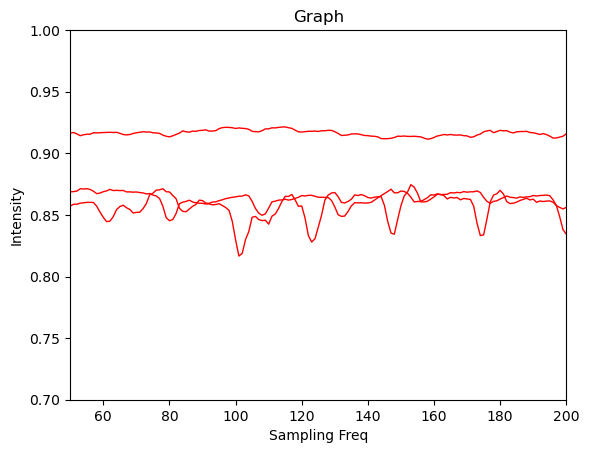

bpm_values  [96.09022018151599, 77.3933939965237, 93.6628830735738]


In [3]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import find_peaks

videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# This is a map from the video ID to its list of frames.
heartbeat_count = 150
videoFrames = {"1":[], "2":[], "3":[]}

bpm_val = []

def rescale_frame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)

    dimensions = (width,height)

    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

def plot_graph_1():
    plt.ylim([0.7,1])
    plt.xlim([50,200])
    plt.show()
    
def bpm(r, fps):
    sampling_rate = fps

    peak_ind, _ = find_peaks(r[50:200], distance=8, width=8)
    mean_beats_dist = np.mean(peak_ind[1:]-peak_ind[0:-1])

    bpm = (1/mean_beats_dist) * sampling_rate * 60
    bpm_val.append(bpm)

    
def main():
    i = 0
    plt.xlabel('Sampling Freq')
    plt.ylabel('Intensity')
    plt.title('Graph')
    for index, videoPath in enumerate(videoPaths):
        cap = cv2.VideoCapture(videoPath)

        #some sample constants in openCV, check out for more
        fps = cap.get(cv2.CAP_PROP_FPS)
        cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

        rgb_avg = []
        while cap.isOpened():
            ret, frame = cap.read()
            
            if ret:
                
                videoFrames[str(index+1)].append(frame)

                crop_img = rescale_frame(frame)
                cv2.imshow("output2", crop_img)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                rgb_avg.append(np.average(crop_img, axis=(0, 1))/255)
            else:
                r,g,b =  np.array(rgb_avg)[:,2], np.array(rgb_avg)[:,1],np.array(rgb_avg)[:,0]
                sz = r.size

                x = [*range(1, sz+1, 1)]
                
                plt.plot(x, r, color="red", linewidth=1)
                print(r)
                bpm(r, fps)
            
                break

        cap.release()
        cv2.destroyAllWindows()

        print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))
      
if __name__ == "__main__":
    main()
    plot_graph_1()
    print("bpm_values ", bpm_val)

#### D. Likelihood Distributions [20 marks]
In the 5-second chunks taken above, choose 20 frames where your sensing metric is close to the local maximum (Case1), and 20 frames where it is close to the local minimum (Case2). Plot the histograms on "R", "G" and "B" values for each pixel in the 20 frames for the two cases 1 and 2. For each video there will be 3 figures, each for "R", "G" and "B". Which one produces the most separable distributions?

max peak  [  4  11  35  55  66  79  87  93 102 110 114 129 137 144]
min peak  [  7  29  50  72  82  97 106 123 132]


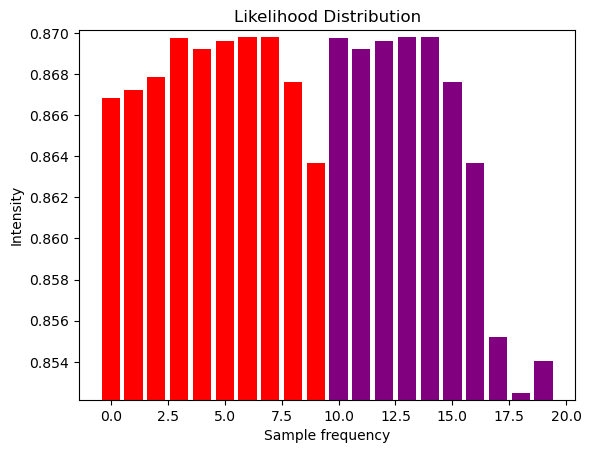

[0.86682189 0.86723351 0.86787317 0.86974888 0.86920097 0.86959149
 0.86978902 0.86978585 0.86760675 0.86365058]
[0.86974888 0.86920097 0.86959149 0.86978902 0.86978585 0.86760675
 0.86365058 0.85519517 0.85250331 0.85402321]
max peak  [44]
min peak  [  4   8  13  22  25  30  40  51  56  66  72  75  84  87  95 100 107 113
 117 120 126 136 143]


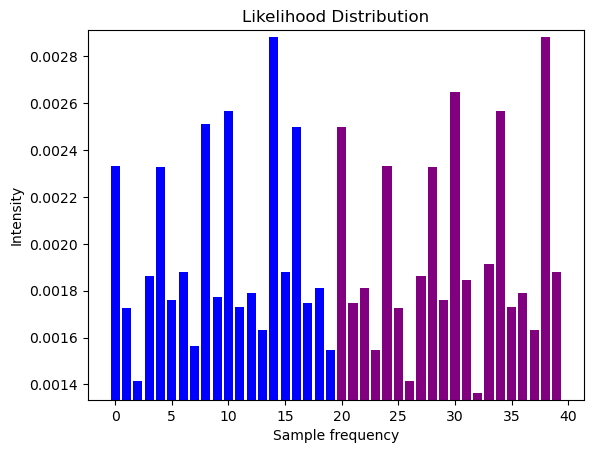

[0.00233255 0.0017272  0.00141272 0.00186226 0.00232854 0.00175884
 0.00187948 0.0015652  0.00251007 0.00177485 0.00256752 0.00173226
 0.0017885  0.00163074 0.00288179 0.00187891 0.00250039 0.00174709
 0.0018134  0.00154785]
[0.00250039 0.00174709 0.0018134  0.00154785 0.00233255 0.0017272
 0.00141272 0.00186226 0.00232854 0.00175884 0.00264919 0.00184364
 0.00136509 0.00191366 0.00256752 0.00173226 0.0017885  0.00163074
 0.00288179 0.00187891]
max peak  [  4  13  19  34  55  66  78  87  93 103 111 120 129 139 143]
min peak  [  7  16  29  51  59  73  81  89  97 106 113 124 132 140]


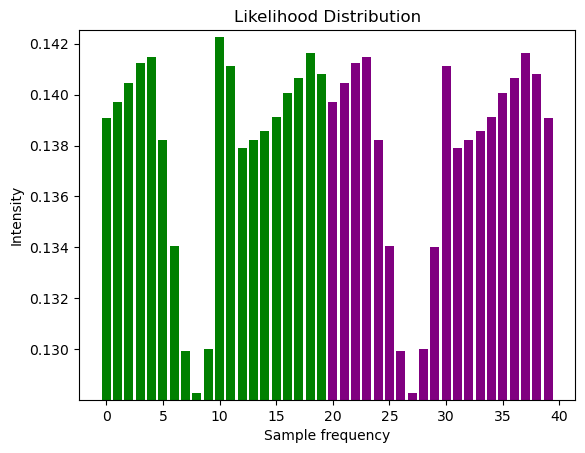

[0.13907422 0.13969715 0.14044965 0.14124128 0.14146034 0.1382349
 0.13405769 0.12992159 0.12829335 0.13002325 0.14225577 0.14114052
 0.1379129  0.13823096 0.1385534  0.13910458 0.14006359 0.14065171
 0.14162828 0.140804  ]
[0.13969715 0.14044965 0.14124128 0.14146034 0.1382349  0.13405769
 0.12992159 0.12829335 0.13002325 0.13403074 0.14114052 0.1379129
 0.13823096 0.1385534  0.13910458 0.14006359 0.14065171 0.14162828
 0.140804   0.13907422]
ppgvideos/1.mp4, Frame Count: 349.0, FPS: 30.10826899020834
max peak  [  5  15  27  52  72  96 122 143]
min peak  [ 10  18  34  41  57  81 103 111 126 134]


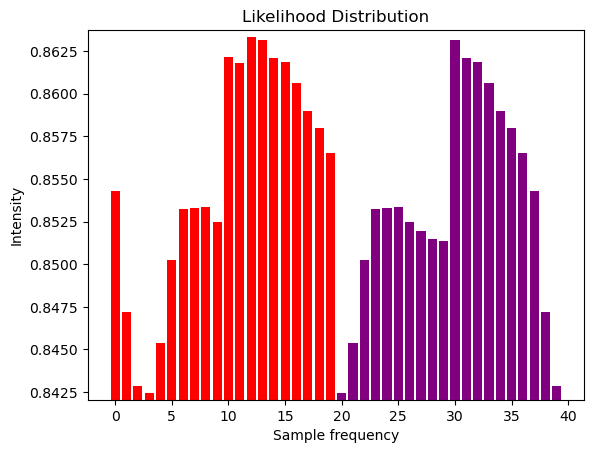

[0.85428269 0.84721169 0.84287932 0.84247066 0.84535304 0.85023289
 0.85322404 0.85326621 0.85335803 0.85249835 0.86216276 0.8617686
 0.86330594 0.86314365 0.86211167 0.8618297  0.86062703 0.85898156
 0.85797804 0.85652736]
[0.84247066 0.84535304 0.85023289 0.85322404 0.85326621 0.85335803
 0.85249835 0.85197029 0.85146814 0.85134921 0.86314365 0.86211167
 0.8618297  0.86062703 0.85898156 0.85797804 0.85652736 0.85428269
 0.84721169 0.84287932]
max peak  [122]
min peak  [  8  11  20  23  30  34  40  45  54  59  62  66  76  81  90  98 103 107
 113 117 134 137 144]


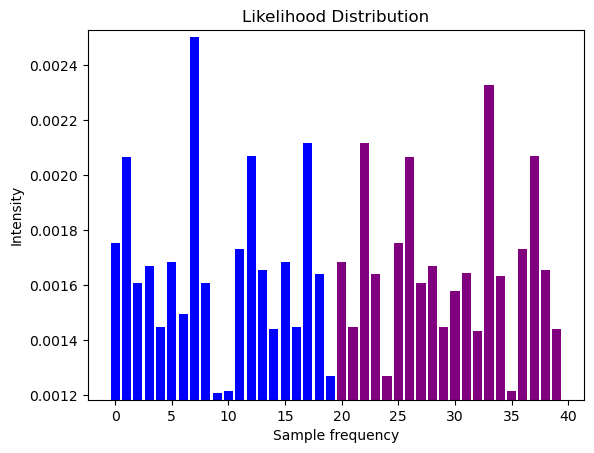

[0.00175188 0.00206585 0.0016064  0.0016707  0.00144702 0.0016824
 0.00149545 0.00250127 0.00160845 0.00120868 0.00121636 0.00172933
 0.00206824 0.00165554 0.00144123 0.00168537 0.00144858 0.00211803
 0.00163879 0.0012696 ]
[0.00168537 0.00144858 0.00211803 0.00163879 0.0012696  0.00175188
 0.00206585 0.0016064  0.0016707  0.00144702 0.00157993 0.00164549
 0.00143382 0.00232804 0.00163186 0.00121636 0.00172933 0.00206824
 0.00165554 0.00144123]
max peak  [  5  14  26  39  53  71  76  86 101 123 130 143]
min peak  [ 12  19  35  41  58  83 104 127 135]


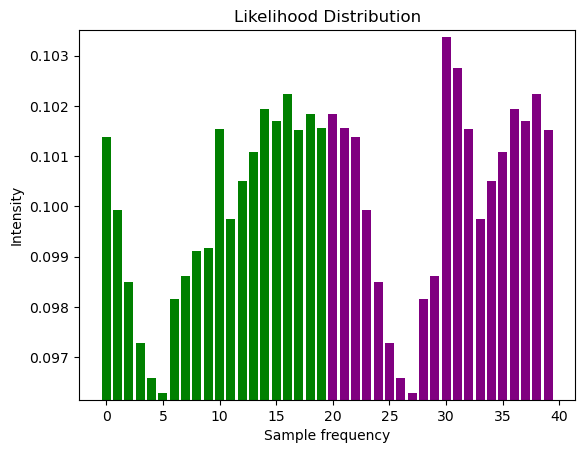

[0.10138259 0.09991957 0.09850617 0.09727689 0.0965861  0.09629756
 0.09815166 0.09862364 0.09911227 0.09917279 0.10153388 0.09975248
 0.10050489 0.10109061 0.10193294 0.10169013 0.10223356 0.10151482
 0.10184688 0.10155446]
[0.10184688 0.10155446 0.10138259 0.09991957 0.09850617 0.09727689
 0.0965861  0.09629756 0.09815166 0.09862364 0.10336363 0.10275118
 0.10153388 0.09975248 0.10050489 0.10109061 0.10193294 0.10169013
 0.10223356 0.10151482]
ppgvideos/2.mp4, Frame Count: 327.0, FPS: 29.925445678655826
max peak  [ 11  21  40  46  64  77  85 100 114 126 129 137]
min peak  [  2  16  29  41  56  69  81  94 107 120 145]


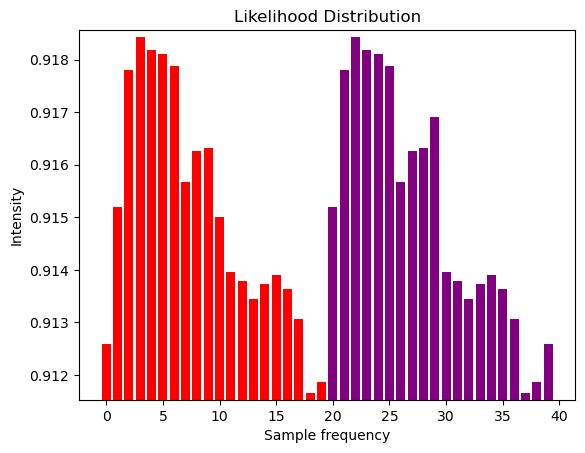

[0.91258558 0.9151904  0.91780548 0.91842473 0.91818414 0.91810325
 0.9178846  0.91567733 0.91626604 0.91631374 0.91500049 0.91395346
 0.91378794 0.91345579 0.91373763 0.91389358 0.91363805 0.91306976
 0.91166636 0.91187483]
[0.9151904  0.91780548 0.91842473 0.91818414 0.91810325 0.9178846
 0.91567733 0.91626604 0.91631374 0.91689994 0.91395346 0.91378794
 0.91345579 0.91373763 0.91389358 0.91363805 0.91306976 0.91166636
 0.91187483 0.91258558]
max peak  [ 4 21 37 45 60 86 99]
min peak  [  8  16  27  53  56  69  83  91 104 107 116 121 123]


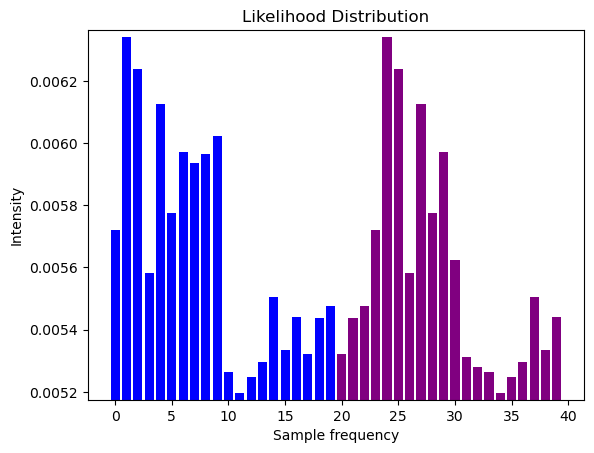

[0.00572211 0.00634096 0.00623877 0.00558158 0.00612545 0.00577441
 0.00597176 0.00593608 0.00596363 0.0060232  0.0052622  0.00519737
 0.00524632 0.00529523 0.00550404 0.00533597 0.00543987 0.00532073
 0.00543702 0.00547484]
[0.00532073 0.00543702 0.00547484 0.00572211 0.00634096 0.00623877
 0.00558158 0.00612545 0.00577441 0.00597176 0.00562488 0.00531133
 0.00527903 0.0052622  0.00519737 0.00524632 0.00529523 0.00550404
 0.00533597 0.00543987]
max peak  [  8  27  43  52  66  77  79  91 102 104 118 125 145]
min peak  [  4  58  73  84  98 111 137]


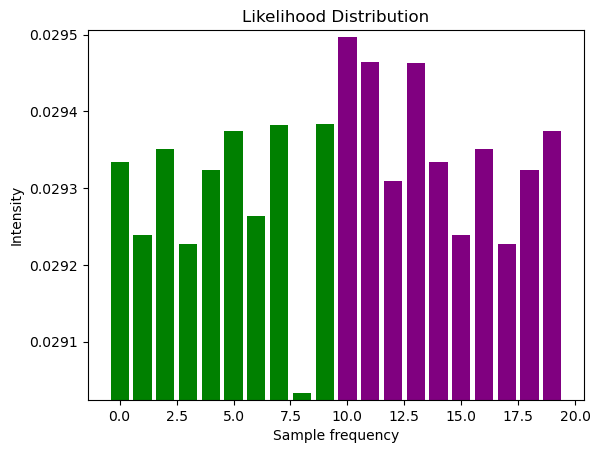

[0.0293339  0.02923941 0.02935097 0.02922778 0.02932396 0.02937475
 0.02926432 0.02938247 0.02903352 0.02938345]
[0.02949668 0.02946415 0.02930873 0.02946321 0.0293339  0.02923941
 0.02935097 0.02922778 0.02932396 0.02937475]
ppgvideos/3.mp4, Frame Count: 318.0, FPS: 29.92008764850274


In [4]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
from itertools import product
import scipy.stats as st

videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# This is a map from the video ID to its list of frames.
videoFrames = {"1":[], "2":[], "3":[]}

colours=['r','g','b']
video_type = ["Normal", "wlaking", "Excercise"]

def rescale_frame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width,height)

    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)


def plot_histogram(maxPeak, minPeak, color):
    data = np.array(np.concatenate([maxPeak,minPeak]))
    margin = 0.02  # adjust margin as needed
    data_max = max(data)
    data_min = min(data)
    y_min = (data_min - margin * (data_max - data_min))
    y_max = (data_max + margin * (data_max - data_min))
    x1 = np.arange(len(maxPeak))
    x2 = np.arange(len(minPeak), len(minPeak) + len(maxPeak))
    plt.bar(x1, np.array(maxPeak), color=color)
    plt.bar(x2, np.array(minPeak), color="purple")
    plt.title("Likelihood Distribution")
    plt.xlabel("Sample frequency")
    plt.ylabel("Intensity")
    plt.ylim([y_min, y_max])
    plt.show()


def find_nearest(arr1, arr2):
    l1 = sorted(product(arr1, arr2), key=lambda t: abs(t[0]-t[1]))[0]
    return l1

def get_sensingMetrics(r, maxMinPos, color):

    l1 = np.array(r[maxMinPos[0]:maxMinPos[0]+10])
    l2 = np.array(r[maxMinPos[0]-10:maxMinPos[0]])

    maxPeakChunk = np.concatenate([l1,l2])

    l3 = np.array(r[maxMinPos[1]:maxMinPos[1]+10])
    l4 = np.array(r[maxMinPos[1]-10:maxMinPos[1]])  

    minPeakChunk = np.concatenate([l3,l4])

    plt.clf()
    plot_histogram(maxPeakChunk, minPeakChunk, color)
    print(maxPeakChunk)
    print(minPeakChunk)


def localMaxMin(r, fps):
    sampling_rate = fps

    # 5 sec of video implies 150 frames approx
    peaks = find_peaks(r[50:200], distance=2, width=2)
    height = peaks[1]['width_heights']  # list of the height of the peaks
    peak_pos = peaks[0]
    print("max peak ", peak_pos)

    r = r*-1
    minima = find_peaks(r[50:200], distance=2, width=2)
    min_height = minima[0]
    print("min peak ", min_height)
    r = r*-1
    maxMinPos = find_nearest(peak_pos , min_height)
    return maxMinPos
    

def main():
    i = 0
    plt.xlabel('time')
    plt.ylabel('hearbeat')
    plt.title('Graph')
    for index, videoPath in enumerate(videoPaths):
        cap = cv2.VideoCapture(videoPath)

        #some sample constants in openCV, check out for more
        fps = cap.get(cv2.CAP_PROP_FPS)
        cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

        rgb_avg = []
        while cap.isOpened():
            ret, frame = cap.read()
            
            if ret:
                
                videoFrames[str(index+1)].append(frame)

                crop_img = rescale_frame(frame)
                cv2.imshow("output2", crop_img)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                rgb_avg.append(np.average(crop_img, axis=(0, 1))/255)
            else:
                r,g,b =  np.array(rgb_avg)[:,2], np.array(rgb_avg)[:,1],np.array(rgb_avg)[:,0]

                maxMinPos = localMaxMin(r, fps)
                get_sensingMetrics(r, maxMinPos, "red")
                maxMinPos = localMaxMin(b, fps, )
                get_sensingMetrics(b, maxMinPos, "blue")
                maxMinPos = localMaxMin(g, fps)
                get_sensingMetrics(g, maxMinPos, "green")
            
                break

        cap.release()
        cv2.destroyAllWindows()

        print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))
      
if __name__ == "__main__":
    main()

As Per the Histograms Plots for the above 3 Videos for R, G, B
Evidently Red histogram plot is giving more Separate Distribution.

From the Histogram plot: Left side is determining for which the graph is plotted
if Left side, i.e., values around local maxima, is Red, then it is for R
Similarly if left side is blue the Graph is for B
and Green then graph is for G

#### E. Threshold Based Detection and ROC curve [25 marks]
Only consider the "R" channel for analysis. Suppose, we just use a single pixel (uniformly randomly chosen in the frame) to detect whether the frame belongs to case 1 or case 2. You can denote the "Case 1" to be the POSITIVE event/hypothesis and "Case 2" to be the NEGATIVE event/null hypothesis. For every threshold value, for every frame, choose 500 random pixels. Compute the "Probability of Detection" ($P_D$) and "Probability of False Alarm" ($P_{FA}$). Note that you have (20 + 20) = 40 frames, and 500 detections per frame, i.e., 20000 total detections. Plot the $ROC$ curve. Which one has the best ROC curve (Dataset 1, 2 or 3)?

ppgvideos/1.mp4, Frame Count: 349.0, FPS: 30.10826899020834
[3.   2.4  0.   0.   2.   0.   0.   4.   0.   2.   2.   2.   0.   2.
 2.   4.   0.   2.   2.   2.   2.   6.   2.   4.   0.   0.   6.   2.
 2.   0.   2.   0.   0.   3.95 1.7  0.   1.1  2.5  0.   3.05 0.   4.
 0.   0.   0.   0.   0.   1.   2.   3.   1.   1.   1.   2.   0.   2.
 0.   1.   2.   1.   0.   1.   3.   1.   0.   0.   1.   2.   1.   1.
 2.   1.   1.   1.   3.   3.   1.   0.   1.   0.   1.   2.   0.   2.
 2.   0.   0.   0.   0.   1.   0.   1.   0.   1.   0.   1.   0.   0.
 0.   1.   0.   1.   1.   0.   0.   0.   0.   0.   1.   2.   2.   0.
 3.   1.   3.   2.   0.   1.   1.   1.   0.   0.   1.   2.   0.   0.
 1.   0.   0.   0.   0.   2.   1.   1.   0.   0.   1.   0.   1.   2.
 2.   1.   1.   0.   3.   0.   1.   0.   3.   1.   0.   3.   1.   2.
 1.   0.   2.   2.   0.   1.   1.   0.   0.   2.   1.   0.   0.   0.
 0.   1.   2.   0.   2.   3.   1.   1.   2.   3.   1.   2.   0.   0.
 1.   0.   1.   0.   0.   0.   2.   2.   0.

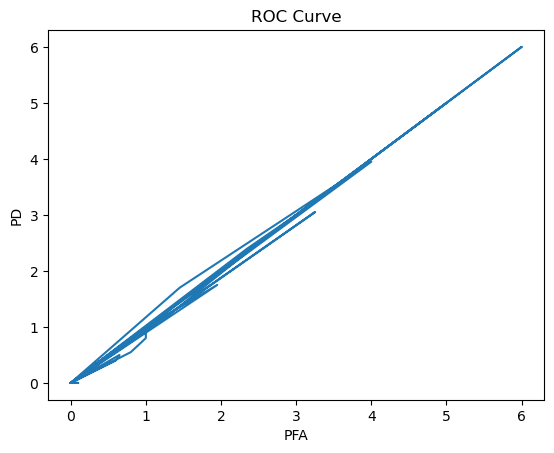

ppgvideos/2.mp4, Frame Count: 327.0, FPS: 29.925445678655826
[3.   2.1  0.   4.   2.   2.   0.   0.   2.   2.   2.   0.   0.   2.
 2.   0.   4.   6.   4.   0.   0.   2.   2.   4.   0.   2.   1.9  7.25
 1.   0.   0.   2.   1.   1.   2.   1.   1.   0.   0.   0.   0.   1.
 2.   1.   1.   2.   2.   1.   1.   2.   1.   0.   1.   0.   0.   1.
 1.   1.   1.   2.   1.   2.   0.   1.   1.   1.   0.   2.   1.   0.
 0.   0.   1.   0.   2.   1.   2.   0.   0.   0.   2.   1.   2.   2.
 0.   1.   1.   1.   0.   0.   1.   1.   1.   0.   0.   0.   1.   4.
 1.   1.   0.   1.   2.   0.   0.   1.   0.   0.   1.   1.   0.   2.
 0.   1.   0.   1.   1.   2.   2.   2.   2.   3.   1.   0.   0.   3.
 0.   3.   0.   2.   0.   1.   1.   1.   0.   2.   1.   1.   1.   2.
 1.   2.   1.   0.   0.   2.   2.   1.   1.   0.   0.   1.   0.   3.
 0.   1.   0.   0.   2.   1.   0.   0.   1.   1.   0.   2.   0.   0.
 2.   0.   1.   0.   1.   0.   1.   2.   0.   0.   1.   0.   1.   0.
 1.   3.   0.   1.   0.   2.   1.   1.  

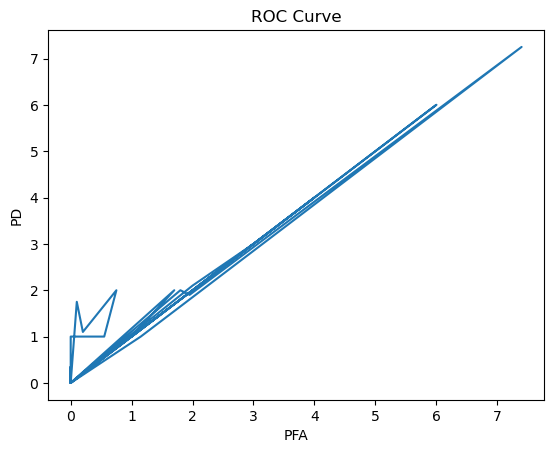

ppgvideos/3.mp4, Frame Count: 318.0, FPS: 29.92008764850274
[3.   2.5  4.75 0.   0.   2.   0.   0.   0.   4.   2.   0.   4.85 3.6
 2.   2.   0.   1.   0.   1.   1.   0.   0.   4.   3.   2.   2.   0.
 2.   2.   5.   0.   2.   0.   3.   0.   0.   1.   0.   3.   1.   0.
 2.   2.   1.   2.   2.   0.   2.   0.   1.   1.   0.   0.   0.   1.
 1.   1.   0.   2.   2.   1.   2.   2.   2.   0.   1.   0.   0.   1.
 3.   0.   0.   0.   0.   1.   0.   0.   0.   0.   1.   3.   2.   1.
 2.   1.   0.   2.   0.   1.   2.   0.   1.   1.   1.   1.   3.   1.
 2.   2.   1.   0.   0.   0.   1.   2.   2.   0.   1.   0.   1.   1.
 1.   2.   1.   2.   1.   1.   1.   1.   1.   0.   0.   2.   1.   2.
 2.   1.   1.   1.   0.   3.   0.   0.   0.   0.   1.   0.   0.   0.
 2.   0.   1.   1.   1.   0.   1.   2.   1.   1.   2.   0.   2.   1.
 1.   0.   0.   2.   0.   1.   1.   2.   1.   0.   0.   0.   0.   1.
 1.   2.   2.   0.   0.   1.   0.   0.   0.   1.   0.   2.   2.   1.
 1.   0.   0.   0.   1.   1.   2.   1.   1

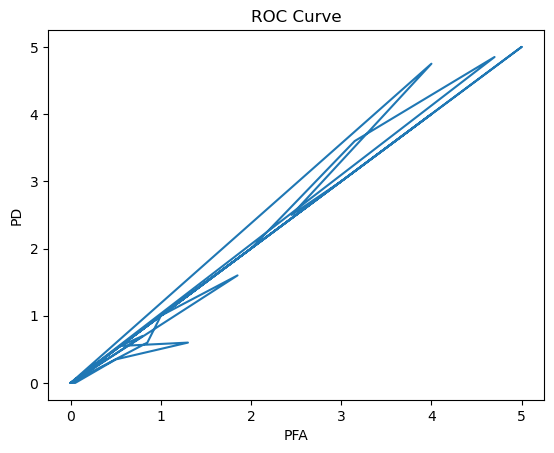

In [5]:
## your snippet to read the three videos, display the number of frames and resolution in each video
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# This is a map from the video ID to its list of frames.

videoFrames = {"1":[], "2":[], "3":[]}

def rescale_frame(frame, scale=0.75):
    width = 500
    height = 500
    dimensions = (width,height)

    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

def randomFramesSelection(fps, index):
    for i in range(20):
        idx = random.randint(0, fps-1)
        case1_frames = videoFrames[str(index)][idx]

        idx = random.randint(0, fps-1)
        case2_frames = videoFrames[str(index)][idx]

        return case1_frames, case2_frames

def computeROC(data1, data2):

    thresholds = np.arange(256)
    PD = np.zeros(500)
    PFA = np.zeros(500)
    frame_num = 20
    pixels = 500

    total_detections = 2 * frame_num * pixels # 20000, 500 detection per frame
    pixel_idx = np.random.randint(0, pixels, size=500)

    for i, T in enumerate(np.linspace(0, 255, num=pixels)):
        TP = np.sum(data1[:frame_num, pixel_idx == i] >= T)
        FP = np.sum(data2[:frame_num, pixel_idx == i] >= T)
        FN = frame_num - TP
        TN = frame_num - FP

        if TP + FN == 0:
            PD[i] = 0
        else:
            PD[i] = TP / (TP + FN)
            PFA[i] = FP / (FP + TN)

    print(PD)
    print(PFA)

    # Plot ROC curve
    plt.plot(PFA, PD)
    plt.xlabel("PFA")
    plt.ylabel("PD")
    plt.title("ROC Curve")
    plt.show()

def main():

    case1_frames = []
    case2_frames = []

    for index, videoPath in enumerate(videoPaths):
        cap = cv2.VideoCapture(videoPath)

        #some sample constants in openCV, check out for more
        fps = cap.get(cv2.CAP_PROP_FPS)
        cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        f_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        f_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

        rgb_avg = []
        while cap.isOpened():
            ret, frame = cap.read()
            
            if ret:
                crop_img = rescale_frame(frame)
                videoFrames[str(index+1)].append(crop_img)
                cv2.imshow("output2", crop_img)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                rgb_avg.append(np.average(crop_img, axis=(0, 1))/255)
            else:
                r,g,b =  np.array(rgb_avg)[:,2], np.array(rgb_avg)[:,1],np.array(rgb_avg)[:,0]
            
                break

        cap.release()
        cv2.destroyAllWindows()

        print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))
        case1_frames, case2_frames = randomFramesSelection(int(fps),index+1)
        computeROC(case1_frames, case2_frames)

      
if __name__ == "__main__":
    main()

#### F. Are "good" samples spatially correlated? [20 marks]
First, choose an optimal threshold, $T_{OPT}$, that best suits your data (maximize $P_D$ while minimizing $P_{FA}$, you may look into maximizing the $\frac{P_D}{P_{FA}}$ ratio). Out of the 20000 total detections above for $T_{OPT}$, can it be hypothesised that the "good" samples (true positives and true negatives) are spatially clustered in certain areas of the frame, compared to the "bad" samples (false positives and false negatives)?

In [15]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

#### Submission (report document: 10 marks)
##### Deadline: $4^{th}$, March, 2023
* Compress the top level directory (ZIP format) containing this notebook with filled-in code along with the ppgvideos folder.
* Include a PDF file (10 marks) within the directory, name it "report.pdf". Mention your name and roll number.
* The report should contain explanations related to the above assignments (A through F), assumptions if any, specific code explanations, algorithms used and inferences made from the plots. Also include references if any.
* <b>You MUST not consult your homework code with others</b>. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.
* Submissions after the deadline will not be entertained.